In [3]:
import matplotlib.pyplot as plt

# 設定中文字型 (Windows 使用微軟正黑體, Mac 使用 Arial Unicode MS)
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
else:
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.rcParams['axes.unicode_minus'] = False # 解決負號顯示問題

#### 載入外部程式庫

anaconda 需額外載入
> tensorflow

> catboost

In [4]:
import pandas as pd
from pandas.testing import assert_frame_equal # panda 檢查
# model
from src.data_processing import DataProcessor
# Evaluater
import sys
import os


#### 準備資料集

##### Load csv


In [5]:
entities_path = {
     "T1"   :   "../DataSet/preprocessingV2_T1_basic.csv"
    ,"T12"  :   "../DataSet/preprocessingV2_T1_2.csv"
    ,"T123" :   "../DataSet/preprocessingV2_T1_2_3.csv"
}
entities = {}

# Load preprocessing and cut 
for index, path in entities_path.items():
    entities[index] = pd.read_csv(path)

print("原始資料：")
for v in entities.values():
    print(f"{v.head()}\n\n")

原始資料：
                                                acct  txn_count  first_txn_ts  \
0  00004bfcb04412faa219f943978c7f75af7960f7add9c4...          1       8674800   
1  00007e8eec41727b71aca0e00cf26c75bd96babafa5203...          7       1257900   
2  000093515bcc2248cb669fa5af67656fce904f5206ef29...          1       9381900   
3  0000a0e0421582f48861ccfe3d386fe7d7e9e30ee5427a...          1       1104600   
4  0000e57c3c5cb730d620e2fa80b40e06fa6fd54f38e1aa...          1       6348600   

   last_txn_ts    std_txn_ts  cross_type   uni_amt  num_unique_dest_accts  \
0      8674800  0.000000e+00           0   19500.0                    0.0   
1      6298200  2.180306e+06           1   12500.0                    2.0   
2      9381900  0.000000e+00           0  155000.0                    1.0   
3      1104600  0.000000e+00           0    2050.0                    0.0   
4      6348600  0.000000e+00           1     445.0                    1.0   

   num_unique_source_accts  is_high_freq  ha

##### Cut acct ID

In [6]:
# Cut preprocessing
entities_id = pd.DataFrame()

for index, entity in entities.items():
    id = entity.iloc[:,[0]]
    entities[index] = entity.iloc[:,1:]

    # 判斷entity id 是否相同
    if entities_id.empty:
        entities_id = id
    else :
        try:
            assert_frame_equal(entities_id, id)
        except AssertionError as e:
            print(f"Data ID error : from {index}")
            print(e)

print("資料ID :")
entities_id.head()

資料ID :


,acct
0,00004bfcb04412faa219f943978c7f75af7960f7add9c4...
1,00007e8eec41727b71aca0e00cf26c75bd96babafa5203...
2,000093515bcc2248cb669fa5af67656fce904f5206ef29...
3,0000a0e0421582f48861ccfe3d386fe7d7e9e30ee5427a...
4,0000e57c3c5cb730d620e2fa80b40e06fa6fd54f38e1aa...


#### 建立 Evaluater評分 (結果產出)

In [7]:
def get_evaluater_score(model,X_train, X_test, y_train, y_test,file_name):
    # 假設您的環境設定
    sys.path.append(os.path.dirname(os.getcwd()))
    from Util.Evaluater import ModelEvaluator

    evaluator = ModelEvaluator(result_dir="lightGBM/Result/") 
    evaluator.evaluate_model(model, (X_train, X_test, y_train, y_test))
    ap, best_thr = evaluator.plot_pr_threshold(model, (X_train, X_test, y_train, y_test), title=file_name)
    evaluator.plot_feature_importance(
    model,
    title="Feature Importance",
    importance_type="gain",
    max_num=20
)

#### 實作 : 定義運行資料集(dict)

In [8]:
# entities 標籤 (dict)
entities_index = []
for index in entities:
    entities_index.append(index)

print(entities_index)

['T1', 'T12', 'T123']


In [9]:
#==== 實作引用資料參考上面 輸出 index ====#

#       這裡手動調整跑訓練的資料集(參考上方輸出)
#                       vv
train_entities_index =["T1","T12","T123"] # ]#
#                       ^^
#       這裡手動調整跑訓練的資料集(參考上方輸出)

#       這裡手動調整跑訓練的次數
#                  vv
model_train_turn = 50
#                  ^^
#       這裡手動調整跑訓練的次數

建立 id - label 對照表

In [14]:
for index in train_entities_index:
    entity = entities[index]
    for idx, label in enumerate(entity.columns):
        print(f"{idx} | {label}")
    print("\n\n")


0 | txn_count
1 | first_txn_ts
2 | last_txn_ts
3 | std_txn_ts
4 | cross_type
5 | uni_amt
6 | num_unique_dest_accts
7 | num_unique_source_accts
8 | is_high_freq
9 | has_foreign_currency
10 | label



0 | is_short_term_mass_receive
1 | txn_count_ratio
2 | txn_amt_ratio
3 | is_night_txn
4 | amt_diff
5 | txn_count
6 | first_txn_ts
7 | last_txn_ts
8 | std_txn_ts
9 | cross_type
10 | uni_amt
11 | num_unique_dest_accts
12 | num_unique_source_accts
13 | is_high_freq
14 | has_foreign_currency
15 | label



0 | is_short_term_mass_receive
1 | txn_count_ratio
2 | txn_amt_ratio
3 | is_night_txn
4 | amt_diff
5 | txn_count
6 | first_txn_ts
7 | last_txn_ts
8 | std_txn_ts
9 | cross_type
10 | uni_amt
11 | num_unique_dest_accts
12 | num_unique_source_accts
13 | is_high_freq
14 | has_foreign_currency
15 | max_send_amt
16 | min_send_amt
17 | avg_send_amt
18 | var_send_amt
19 | std_send_amt
20 | max_recv_amt
21 | min_recv_amt
22 | avg_recv_amt
23 | var_recv_amt
24 | std_recv_amt
25 | total_send_amt
26 | tota

#### 實作 : 資料分析 ( AE + CatBoost )

In [11]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
sys.path.append(os.path.dirname(os.getcwd()))
from Util.PrepareData import DataPreparer


In [12]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbose': -1,
    'n_jobs': -1,
    
    # --- 核心學習率 ---
    'learning_rate': 0.03,      # 調低學習率，讓模型學得更穩，避免快速過擬合
    'n_estimators': 1000,       # 樹的數量，建議搭配 early_stopping 使用
    
    # --- 抗過擬合 (重點調整區) ---
    'num_leaves': 20,           # 預設是 31，調小此值可大幅減少過擬合
    'max_depth': 6,             # 限制樹的深度，避免模型記住太多細節
    'min_child_samples': 50,    # 每個葉子節點最少要有 50 筆資料，避免針對少數噪聲學習
    
    # --- 正則化 ---
    'reg_alpha': 0.5,           # L1 正則化 (過濾沒用的特徵)
    'reg_lambda': 0.5,          # L2 正則化 (防止權重過大)
    
    # --- 樣本抽樣 ---
    'subsample': 0.8,           # 每次訓練只用 80% 的資料
    'colsample_bytree': 0.8,    # 每次訓練只用 80% 的特徵

    # --- 類別平衡 ---
    # is_unbalance=True,        # 千萬不要設 True，這會讓 Recall 很高但 Precision 很低
    'scale_pos_weight': 4,      # 手動設定權重。設為 1 會偏向 Precision；設越大越偏向 Recall。
                                # 試試 3 到 5 之間來抓取 P/R 的平衡點。
}


index = T1
Training data:	Positive samples: 4015,	Negative samples: 3993,Ratio: 0.50
Test data:	Positive samples: 201,	Negative samples: 998,	Ratio: 0.17
finish prepare_data_cutting

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[851]	valid_0's auc: 0.994223

--------------------------------------------------
evaluater 測試：
--------------------------------------------------
finish evaluate_model



c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

finish plot_pr_threshold

finish plot_feature_importance


--------------------------------------------------
Label = 1 (alert) 的準確度：
--------------------------------------------------
finish evaluate_model



c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samp

finish plot_pr_threshold

finish plot_feature_importance


index = T12
Training data:	Positive samples: 4015,	Negative samples: 3993,Ratio: 0.50
Test data:	Positive samples: 201,	Negative samples: 998,	Ratio: 0.17
finish prepare_data_cutting

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[795]	valid_0's auc: 0.995515

--------------------------------------------------
evaluater 測試：
--------------------------------------------------
finish evaluate_model



c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  

finish plot_pr_threshold

finish plot_feature_importance


--------------------------------------------------
Label = 1 (alert) 的準確度：
--------------------------------------------------
finish evaluate_model



c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\1than\anaconda3\envs\data\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samp

finish plot_pr_threshold



KeyboardInterrupt: 

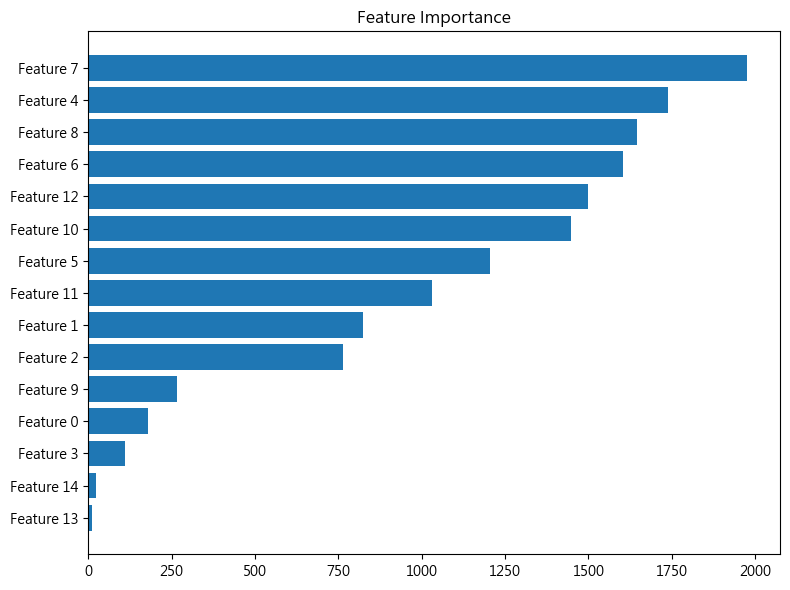

In [13]:
for index in train_entities_index:
    print(f"\nindex = {index}")
    
    # 1. 初始化 LightGBM 模型
    # is_unbalance=True 是針對不平衡資料的關鍵參數
    model = lgb.LGBMClassifier(**params)
    
    entity = entities[index]

    # 切分訓練與測試資料(第一次切分) -> 訓練(train) : 模型訓練與參數調整 ; 測試集(test_final) : 跑最後分數
    preparer = DataPreparer(random_state=42)
    dataset = preparer.prepare_cutting(df = entity,neg_ratio=0.015, pos_scale=5, test_size=0.20)
    X_train_full, X_test_final, y_train_full, y_test_final  = dataset 

    # 訓練集再切分(第二次切分) -> 訓練(train) : 模型訓練 ; 驗證(val) : 模型參數調整
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full,
        test_size=0.3,       # 切 20% 當驗證集
        random_state=42,     # 固定種子碼確保結果可重現
        stratify=y_train_full # 確保切分後的 Label 比例與原本一致
    )

    # -------------------------------------------------------------------------
    # [新增步驟] : 將 "訓練資料 (Full)" 再切分為 "真正訓練用 (Train)" 與 "驗證用 (Val)"
    # 建議比例：從訓練集中切出 20% 作為驗證集
    # stratify=y_train_full 非常重要！因為你的資料不平衡，必須確保驗證集也有 Label 1
    # -------------------------------------------------------------------------

    # 2. 訓練模型 (加入驗證集與早停機制)
    # 注意：新版 LightGBM 建議使用 callbacks 來處理 early_stopping
    # 建立模型

    # 訓練時建議加入 eval_set 來監控 (避免過度訓練)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(stopping_rounds=50)]
    )
    
    # 取得 PR
    # threshold = plot_pr_curve_with_best_point(model, X_test_final, y_test_final,f"{index}.png")

    # evaluater
    print ("\n"+"-"*50)
    print ("evaluater 測試：")
    print ("-"*50)
    get_evaluater_score(model,X_train, X_test_final, y_train, y_test_final,f"{index}")
        
    # 找回 label = 1 的準確度
    """
    - entity_label1 : 全部為 label 1 的資料集
    - X_label1, y_label1 : 從 entity_label1 切分出來的訓練資料 (All label 1)
    - X_test_label1, y__test_label1 : 從 X_test 切分出來的測試資料 (All label 1)
    """
    # All label 1
    entity_label1 = entity.copy()
    label,entity_label1_cut = DataProcessor.cut_label(entity_label1) # label -> enitiy的 label ; entity_label1_cut -> entity 移除 label 列 
    X_label1 = DataProcessor.split_diff_label(entity_label1_cut, label, positive_label=True) # label1 -> entity 移除 label 列並取 label = 1 (alert)
    y_label1 = pd.Series([1]*X_label1.shape[0]) # 全部為 1
    X_label1.columns = range(X_label1.shape[1])
    X_label1 = DataProcessor.scaler(X_label1)

    # 產生分數
    print ("\n"+"-"*50)
    print ("Label = 1 (alert) 的準確度：")
    print ("-"*50)
    get_evaluater_score(model, X_train, X_label1, y_train, y_label1,f"{index}_label1")
        
